# 0. 데이터 불러오기

In [27]:
import pandas as pd

df = pd.read_excel('/Users/kyunghee/Library/Mobile Documents/com~apple~CloudDocs/깃허브 repo/2024_Incheon_International_Airport_MaaS_Project/data_analysis/2021년 교통접근성지표_20240530/02_접근가능인구비율_2021.xlsx',
                   sheet_name= '접근 가능 인구 비율',
                   header = [4,5])

df.columns = df.columns.map('_'.join).str.strip()

df

,Year_Unnamed: 0_level_1,HDCD_Unnamed: 1_level_1,Region_Unnamed: 2_level_1,HDCD_Lev_Unnamed: 3_level_1,Faci_CD_Unnamed: 4_level_1,Time_Zone_Unnamed: 5_level_1,Mode_Unnamed: 6_level_1,HDCD_SD_NM_Unnamed: 7_level_1,HDCD_SGG_NM_Unnamed: 8_level_1,HDCD_EMD_NM_Unnamed: 9_level_1,Region_NM_Unnamed: 10_level_1,Faci_CA_Unnamed: 11_level_1,Faci_NM_Unnamed: 12_level_1,Time_Zone_NM_Unnamed: 13_level_1,Mode_NM_Unnamed: 14_level_1,접근 가능 인구 비율(%)_15분 이내,접근 가능 인구 비율(%)_30분 이내,접근 가능 인구 비율(%)_45분 이내,접근 가능 인구 비율(%)_60분 이내
0,2021,0,-,0,11,0_AllDay,1_PC,전국,-,-,전체,교육시설,초등학교,일평균(06-20시),승용차,99.919764,99.991523,99.991783,99.991783
1,2021,0,-,0,11,0_AllDay,2_PT,전국,-,-,전체,교육시설,초등학교,일평균(06-20시),대중교통/도보,95.192749,98.726707,99.180313,99.442028
2,2021,0,-,0,11,1_T0709,1_PC,전국,-,-,전체,교육시설,초등학교,오전첨두(07-09시),승용차,99.917607,99.991523,99.991783,99.991820
3,2021,0,-,0,11,1_T0709,2_PT,전국,-,-,전체,교육시설,초등학교,오전첨두(07-09시),대중교통/도보,95.352254,98.822857,99.304905,99.573760
4,2021,0,-,0,11,2_T1214,1_PC,전국,-,-,전체,교육시설,초등학교,낮시간(12-14시),승용차,99.918128,99.991523,99.991932,99.991932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348387,2021,3902062,-,4,43,1_T0709,2_PT,제주특별자치도,서귀포시,예래동,전체,광역교통시설,공항,오전첨두(07-09시),대중교통/도보,0.000000,0.000000,0.000000,11.616867
348388,2021,3902062,-,4,43,2_T1214,1_PC,제주특별자치도,서귀포시,예래동,전체,광역교통시설,공항,낮시간(12-14시),승용차,0.000000,0.000000,0.000000,33.119240
348389,2021,3902062,-,4,43,2_T1214,2_PT,제주특별자치도,서귀포시,예래동,전체,광역교통시설,공항,낮시간(12-14시),대중교통/도보,0.000000,0.000000,0.000000,0.000000
348390,2021,3902062,-,4,43,3_T1820,1_PC,제주특별자치도,서귀포시,예래동,전체,광역교통시설,공항,저녁첨두(18-20시),승용차,0.000000,0.000000,0.000000,0.000000


# 1. 데이터 전처리

In [28]:
df = df[df['Faci_NM_Unnamed: 12_level_1']=='공항']

df = df[
    (df['HDCD_SD_NM_Unnamed: 7_level_1']=='서울특별시') | 
    (df['HDCD_SD_NM_Unnamed: 7_level_1']=='경기도')
]

df = df[df['HDCD_SGG_NM_Unnamed: 8_level_1'] != '-']

filtered_df = df[['Year_Unnamed: 0_level_1','Faci_NM_Unnamed: 12_level_1','HDCD_SD_NM_Unnamed: 7_level_1', 'HDCD_SGG_NM_Unnamed: 8_level_1', 'Time_Zone_NM_Unnamed: 13_level_1', 'Mode_NM_Unnamed: 14_level_1', '접근 가능 인구 비율(%)_15분 이내', '접근 가능 인구 비율(%)_30분 이내', '접근 가능 인구 비율(%)_45분 이내', '접근 가능 인구 비율(%)_60분 이내']]

filtered_df

,Year_Unnamed: 0_level_1,Faci_NM_Unnamed: 12_level_1,HDCD_SD_NM_Unnamed: 7_level_1,HDCD_SGG_NM_Unnamed: 8_level_1,Time_Zone_NM_Unnamed: 13_level_1,Mode_NM_Unnamed: 14_level_1,접근 가능 인구 비율(%)_15분 이내,접근 가능 인구 비율(%)_30분 이내,접근 가능 인구 비율(%)_45분 이내,접근 가능 인구 비율(%)_60분 이내
432,2021,공항,서울특별시,종로구,일평균(06-20시),승용차,0.0,0.0,15.189095,85.941307
433,2021,공항,서울특별시,종로구,일평균(06-20시),대중교통/도보,0.0,0.0,12.921706,93.946311
434,2021,공항,서울특별시,종로구,오전첨두(07-09시),승용차,0.0,0.0,29.061217,88.383561
435,2021,공항,서울특별시,종로구,오전첨두(07-09시),대중교통/도보,0.0,0.0,19.068314,98.372074
436,2021,공항,서울특별시,종로구,낮시간(12-14시),승용차,0.0,0.0,21.234736,94.169465
...,...,...,...,...,...,...,...,...,...,...
168515,2021,공항,경기도,양평군,오전첨두(07-09시),대중교통/도보,0.0,0.0,0.000000,0.000000
168516,2021,공항,경기도,양평군,낮시간(12-14시),승용차,0.0,0.0,0.000000,39.436922
168517,2021,공항,경기도,양평군,낮시간(12-14시),대중교통/도보,0.0,0.0,0.000000,0.000000
168518,2021,공항,경기도,양평군,저녁첨두(18-20시),승용차,0.0,0.0,0.000000,48.549323


In [29]:
group_columns = ['HDCD_SD_NM_Unnamed: 7_level_1', 'HDCD_SGG_NM_Unnamed: 8_level_1', 'Mode_NM_Unnamed: 14_level_1']
value_columns = ['접근 가능 인구 비율(%)_15분 이내', '접근 가능 인구 비율(%)_30분 이내', '접근 가능 인구 비율(%)_45분 이내', '접근 가능 인구 비율(%)_60분 이내']

grouped_df = filtered_df.groupby(group_columns)[value_columns].mean().reset_index()


grouped_df

,HDCD_SD_NM_Unnamed: 7_level_1,HDCD_SGG_NM_Unnamed: 8_level_1,Mode_NM_Unnamed: 14_level_1,접근 가능 인구 비율(%)_15분 이내,접근 가능 인구 비율(%)_30분 이내,접근 가능 인구 비율(%)_45분 이내,접근 가능 인구 비율(%)_60분 이내
0,경기도,가평군,대중교통/도보,0.000000,0.000000,0.000000,0.000000
1,경기도,가평군,승용차,0.000000,0.000000,0.000000,0.000000
2,경기도,고양시,대중교통/도보,0.000000,2.256844,29.963863,82.939002
3,경기도,고양시,승용차,0.010196,32.021218,95.799690,100.000000
4,경기도,고양시 덕양구,대중교통/도보,0.000000,5.859057,40.916272,85.154712
...,...,...,...,...,...,...,...
141,서울특별시,종로구,승용차,0.000000,0.000000,14.645135,73.760367
142,서울특별시,중구,대중교통/도보,0.000000,0.000000,31.835841,99.224202
143,서울특별시,중구,승용차,0.000000,0.000000,7.069234,74.269029
144,서울특별시,중랑구,대중교통/도보,0.000000,0.000000,0.000000,0.171602


In [30]:
grouped_df.to_csv('2021_data.csv', index=True)

# 2. 시각화

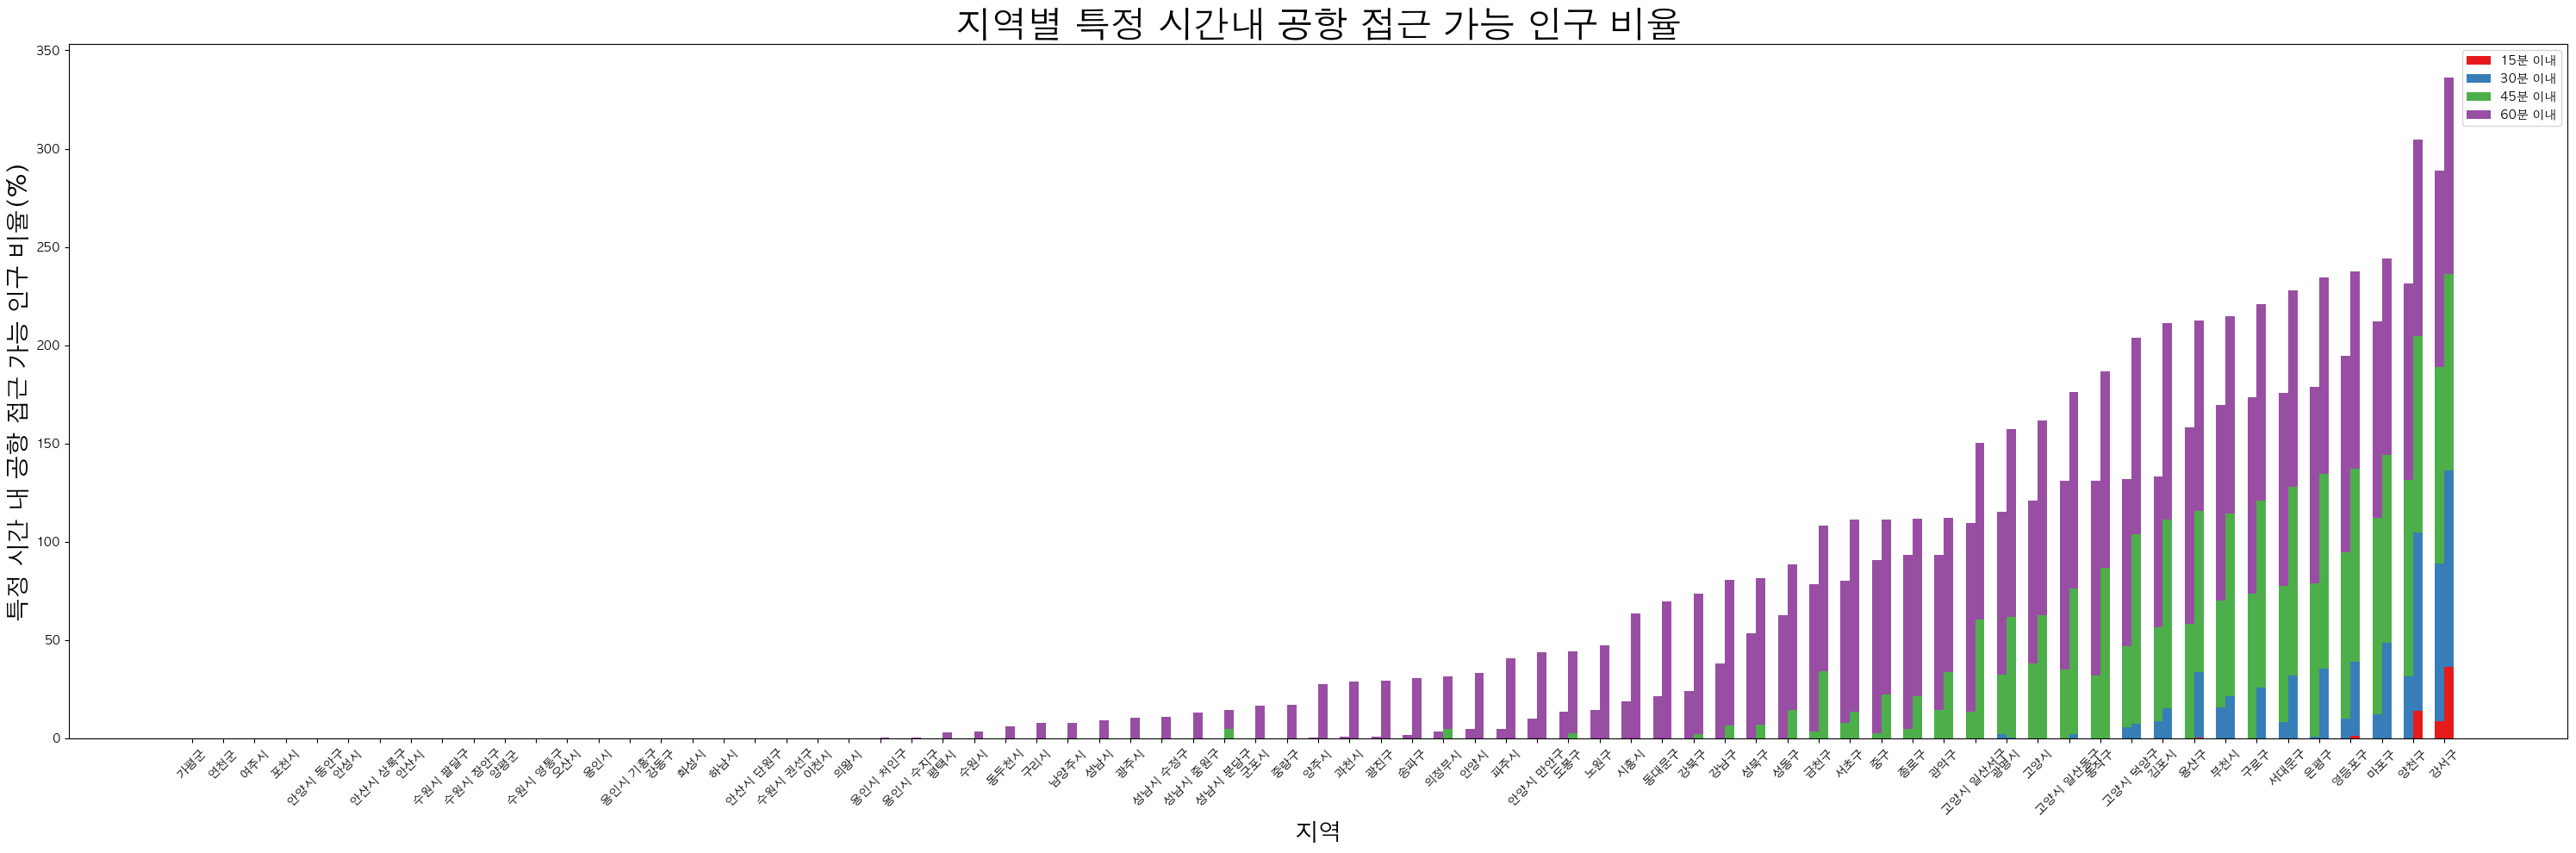

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

plt.rc('font', family='AppleGothic')

grouped_df['total'] = grouped_df[value_columns].sum(axis=1)
grouped_df = grouped_df.sort_values(by='total')


regions = grouped_df['HDCD_SGG_NM_Unnamed: 8_level_1'].unique()
modes = grouped_df['Mode_NM_Unnamed: 14_level_1'].unique()
legend_labels = ['15분 이내', '30분 이내', '45분 이내', '60분 이내']

colors = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(30,10))

bar_width=0.3
index = np.arange(len(regions))

for i, mode in enumerate(modes):
    mode_df = grouped_df[grouped_df['Mode_NM_Unnamed: 14_level_1'] == mode]
    for j, (value, label) in enumerate(zip(value_columns, legend_labels)):
        heights = mode_df[value].values
        bottom = mode_df[value_columns[:j]].sum(axis=1).values if j > 0 else np.zeros(len(heights))
        ax.bar(index + i * bar_width, heights, bar_width, bottom=bottom, color=colors[j], label=label if i == 0 else "")
        
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=15)        
        
        
ax.set_xlabel('지역', fontsize=20)
ax.set_ylabel('특정 시간 내 공항 접근 가능 인구 비율(%)', fontsize=20)
ax.set_title('지역별 특정 시간내 공항 접근 가능 인구 비율', fontsize=30)
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(regions, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()